In [1]:
# Importing pandas
import pandas as pd

# Loading in the data
pulls = pd.read_csv("datasets/pulls.csv")
pull_files = pd.read_csv("datasets/pull_files.csv")

In [2]:
# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls["date"], utc=True)

In [3]:
# Merge the two DataFrames
data = pd.merge(pulls, pull_files, on="pid")

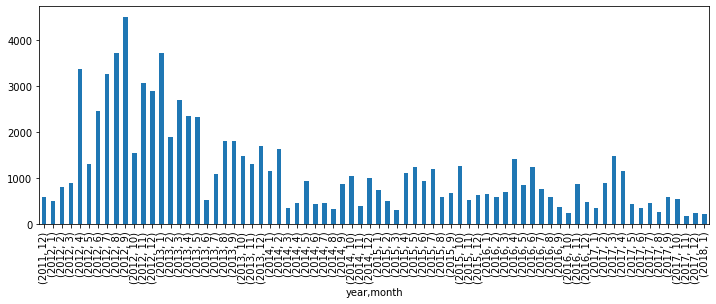

In [4]:
%matplotlib inline

# Create a column that will store the month
data['month'] = data["date"].dt.month

# Create a column that will store the year
data['year'] = data["date"].dt.year

# Group by the month and year and count the pull requests
counts = data.groupby(["year","month"])["pid"].count()

# Plot the results
counts.plot(kind='bar', figsize = (12,4))

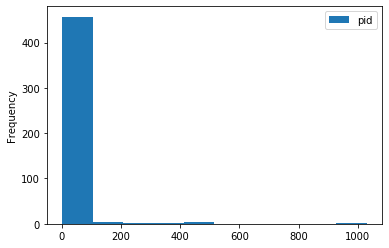

In [5]:
# Required for matplotlib
%matplotlib inline

# Group by the submitter
by_user = pulls.groupby('user').agg({'pid':'count'})
# Plot the histogram
by_user.plot.hist()

In [6]:
# Identify the last 10 pull requests
last_10 = pulls.nlargest(10, "pid")

# Join the two data sets
joined_pr = last_10.merge(pull_files, on="pid")

# Identify the unique files
files = set(joined_pr["file"])

# Print the results
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

In [7]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data["file"]==file]

# Count the number of changes made by each developer
author_counts = file_pr.groupby("user").count()

# Print the top 3 developers
author_counts.nlargest(3,"pid")

,pid,date,file,month,year
user,,,,,
xeno-by,11,11,11,11,11
retronym,5,5,5,5,5
soc,4,4,4,4,4


In [8]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files["file"]==file]

# Merge the obtained results with the pulls DataFrame
joined_pr = pd.merge(file_pr, pulls, on="pid")

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10,"pid", keep="last")["user"])

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

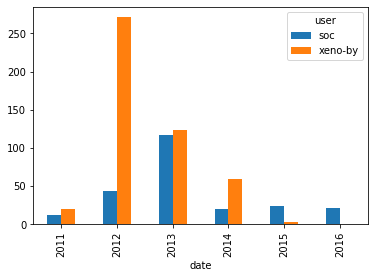

In [9]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls["user"].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby(["user", by_author["date"].dt.year]).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot(kind="bar")

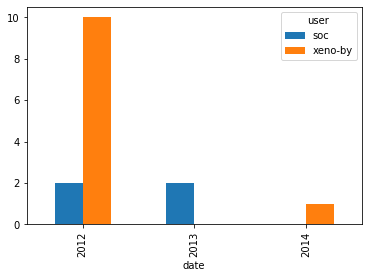

In [10]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data["user"].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author["file"]==file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index="date", columns="user", values="pid", fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')